<img src='./pic/sharif-main-logo.png' alt="SUT logo" width=300 height=300 align=left class="saturate" > <br>

<div dir=ltr align=center>
<font color=0F5298 size=7>
    Machine Learning <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Fall 2024 <br>
<font color=3C99D size=5>
    Practical Assignment 1 - Supervised Learning <br>
<font color=696880 size=4>
    Erfan Salima, Nikan Vasei, Fatemeh Shiri, Sarina Heshmati

____

# Personal Data

In [26]:
student_number = '401109477'
Name = 'Sadegh'
Last_Name = 'Mohammadian'

# Libraries

In [27]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures

# Polynomial Regression & Bias-Variance Tradeoff (100 Points)

<font size=4>
Author: Nikan Vasei

## Introduction
In this part, we will explore the **bias-variance tradeoff** using polynomial regression models. Polynomial regression allows us to model complex relationships between an independent variable $X$ and a dependent variable $y$ by introducing higher-degree polynomial terms. However, increasing the complexity of the model can lead to **overfitting** or **underfitting**, which are key concepts in the bias-variance tradeoff.

## Plan
1. **Create a synthetic dataset**: Use the provided quadratic function to generate $X$ and $y$ with noise.
2. **Split the dataset**: Divide the data into training and test sets to evaluate model generalization.
3. **Train polynomial models**: Fit polynomial regression models with degrees ranging from 1 to 10 (or more).
4. **Evaluate performance**: Calculate the MSE for both training and test sets and compare the errors for different polynomial degrees.
5. **Analyze the results**: Use plots to visualize how the error on the training and test sets changes as the model complexity increases.

## Objective
The objective is to determine the degree of the polynomial that best models the relationship between $X$ and $y$ and balances both underfitting and overfitting, i.e., the degree that achieves the best generalization.

## 1. Create a synthetic dataset (15 Points)

Your first task is to define a function that generates a dataset with 1000 samples. The input values for the independent variable $X$ should be randomly selected within the range of **-3 to 3**. To make the dataset more realistic, add noise to the output using a normal distribution with a mean of 0 and a standard deviation of 10.

The relationship between the independent variable $X$ and the dependent variable $y$ is modeled by the following equation:

$$
y = 0.2X^6 - 0.5X^5 + 2X^4 - 5X^3 + 3X^2 - 10X + 5 + \text{noise}
$$

In [28]:
def generate_dataset(range_start, range_end, num_samples=1000, noise_std=10.0):

    X = np.random.uniform(range_start, range_end, num_samples)
    noise = np.random.normal(0, noise_std, num_samples)
    y = 0.2 * X**6 - 0.5 * X**5 + 2 * X**4 - 5 * X**3 + 3 * X**2 - 10 * X + 5 + noise

    return X, y


Use a scatter plot to visualize the relationship between $X$ and $y$. This will help you understand the structure of the generated data before moving on to fitting models.

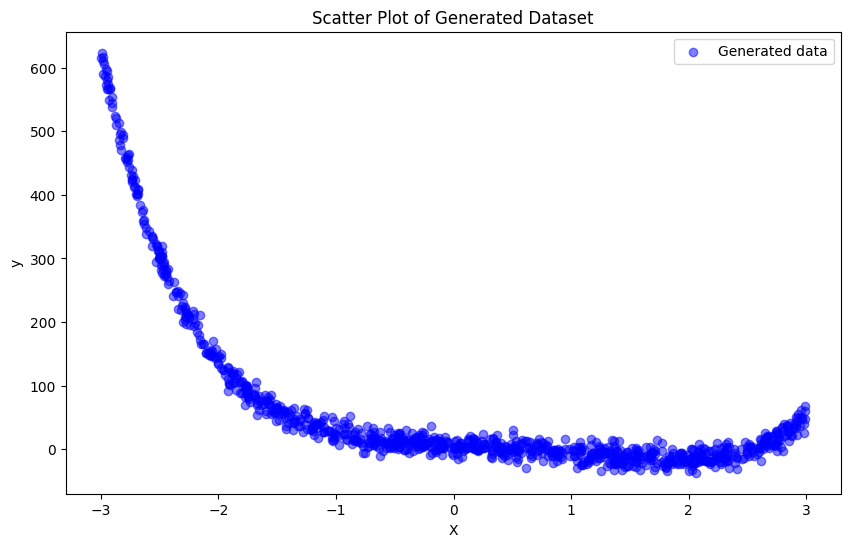

In [29]:
X, y = generate_dataset(-3, 3)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.5, color='blue', label='Generated data')
plt.title('Scatter Plot of Generated Dataset')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

## 2. Splitting the Dataset (5 Points)

In this task, you should split the dataset into three parts:
1. **Training Set**
2. **In-Range Test Set**: This set should contain data within the same range as the training set.
3. **Out-of-Range Test Set**: This set should contain data in the range **[5, 7]**.

Ensure that the two test sets (In-Range and Out-of-Range) have the same length. You can use the `train_test_split` function from the `sklearn` library for convenience in splitting the data.

In [30]:
X_train, X_in_range_test , y_train, y_in_range_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_out_range_test, y_out_range_test = generate_dataset(5, 7, num_samples=len(X_in_range_test))


Again, you can use a scatter plot (or similar plots) to visualize the different sets and see their overall distributions.

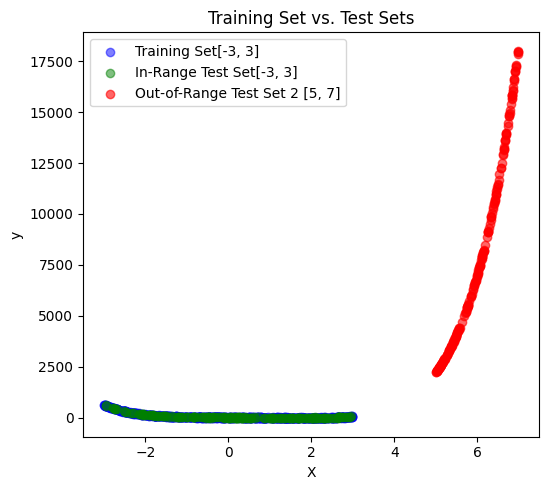

In [31]:
plt.figure(figsize=(15, 5))

# Training Set
plt.subplot(1, 3, 1)
plt.title('Training Set vs. Test Sets')
plt.scatter(X_train, y_train, alpha=0.5, color='blue', label='Training Set[-3, 3]')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

plt.scatter(X_in_range_test, y_in_range_test, alpha=0.5, color='green', label='In-Range Test Set[-3, 3]')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

plt.scatter(X_out_range_test, y_out_range_test, alpha=0.6, color='red', label='Out-of-Range Test Set 2 [5, 7]')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

plt.tight_layout()
plt.show()

## 3. Polynomial Regression Training (25 Points)

In this task, you should train polynomial regression models with varying degrees, ranging from degree = 2 to degree = 9. You can use the `preprocessing`, `linear_model`, and `pipeline` classes from the `sklearn` library to create and evaluate these models.

In [32]:
def train_models(X, y, degree):

    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X, y)

    return model

In [33]:
models = {}
max_degree = 9

for i in range(2, max_degree + 1):
    models[i] = train_models(X_train.reshape(-1, 1), y_train,i)

## 4. Model Evaluation (20 Points)

In this task, you should evaluate the polynomial regression models on both test sets (In-Range Test Set and Out-of-Range Test Set) using Mean Squared Error (MSE). This evaluation will help you understand how well each model generalizes to different data ranges.

For each polynomial degree, compute the MSE on both the in-range test set and the out-of-range test set using the `mean_squared_error` function from the `sklearn` library.

In [34]:
def evaluate_models(models, X_test, y_test):
    losses = {}

    for degree, model in models.items():
        y_pred = model.predict(X_test)
        mse_error = mean_squared_error(y_test, y_pred)
        losses[degree] = mse_error

    return losses

In [35]:
loss_train = evaluate_models(models, X_train.reshape(-1, 1), y_train)
loss_test_in_range = evaluate_models(models, X_in_range_test.reshape(-1, 1), y_in_range_test)
loss_test_out_range = evaluate_models(models, X_out_range_test.reshape(-1, 1), y_out_range_test)

print("loss_train: ",loss_train)
print("loss_test_in_range",loss_test_in_range)
print("loss_test_out_range",loss_test_out_range)

loss_train:  {2: 2624.7941505795275, 3: 951.3005961658092, 4: 129.2209953354211, 5: 109.67728005133932, 6: 102.93091189948602, 7: 102.93062013190938, 8: 102.91439795022816, 9: 102.87966990948262}
loss_test_in_range {2: 1973.431362511423, 3: 771.8845723697514, 4: 122.45264598176847, 5: 100.01854068443373, 6: 93.4214049615555, 7: 93.44049352311745, 8: 93.39620984011268, 9: 93.338063741296}
loss_test_out_range {2: 72739034.76409741, 3: 108734116.1299192, 4: 26674025.132699262, 5: 72930862.60205063, 6: 255085.4393936523, 7: 530171.4468492226, 8: 39009370.79817562, 9: 2270629015.3688855}


## 5. Analyzing Model Scores (20 Points)

In this task, you will visualize and analyze the performance of polynomial regression models by plotting the **logarithm** (to better visualize differences) of losses (Mean Squared Error, MSE) for both training and test set and also by printing the losses related to each degree.

Make sure to train each model a few times to get a sense of variability in the results.

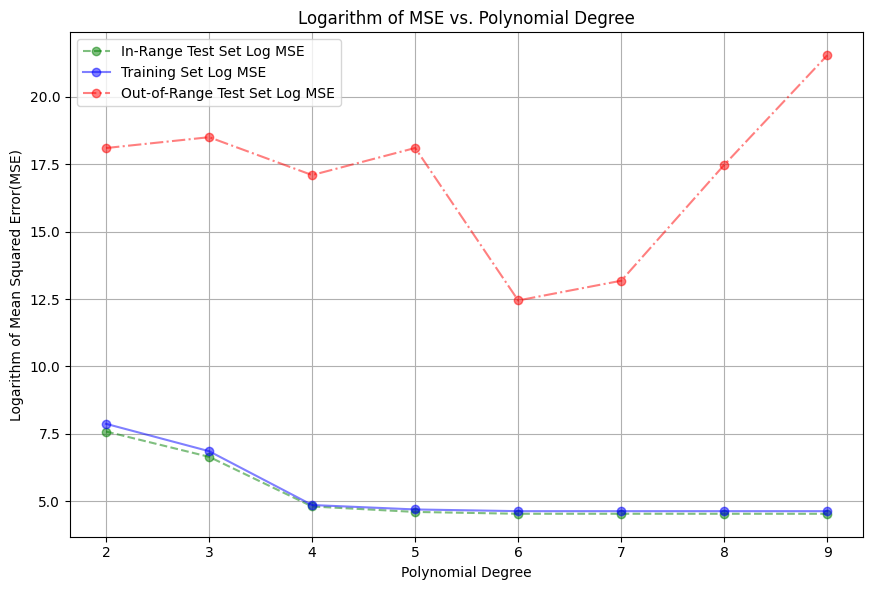

In [36]:
log_loss_train = np.log(list(loss_train.values()))
log_loss_test_in_range = np.log(list(loss_test_in_range.values()))
log_loss_test_out_range = np.log(list(loss_test_out_range.values()))

plt.figure(figsize=(25, 6))
mod = [2,3,4,5,6,7,8,9]

plt.subplot(1, 3, 1)
plt.title('Logarithm of MSE vs. Polynomial Degree')
plt.xlabel('Polynomial Degree')
plt.ylabel('Logarithm of Mean Squared Error(MSE)')


plt.plot(mod, log_loss_test_in_range, alpha=0.5, color='green', label='In-Range Test Set Log MSE',linestyle='--',marker='o')
plt.legend()
plt.plot(mod, log_loss_train, alpha=0.5, color='blue', label='Training Set Log MSE',linestyle='-',marker='o')
plt.legend()
plt.plot(mod, log_loss_test_out_range, alpha=0.5, color='red', label='Out-of-Range Test Set Log MSE',linestyle='-.',marker='o')
plt.legend()

plt.grid()
plt.tight_layout()
plt.show()


In [12]:
  # TODO: Print each model loss on the training and the two test sets
pd.options.display.float_format = '{:.2f}'.format
data = {
    "Degree": [2, 3, 4, 5, 6, 7, 8, 9],
    "Train MSE": log_loss_train ,
    "In-Range Test MSE": log_loss_test_in_range ,
    "Out-of-Range Test MSE": log_loss_test_out_range
}

df = pd.DataFrame(data)
print(df.to_string(index=False))

 Degree  Train MSE  In-Range Test MSE  Out-of-Range Test MSE
      2       7.67               8.21                  18.16
      3       6.59               7.01                  18.55
      4       4.72               4.90                  17.24
      5       4.57               4.64                  18.17
      6       4.50               4.59                   8.76
      7       4.50               4.60                  16.40
      8       4.49               4.60                  21.50
      9       4.49               4.60                  21.82


## Conclusion (15 Points)

1. Based on your analysis of the training set loss, in-range test set loss, and out-of-range test set loss across different polynomial degrees, summarize what you have learned about the bias-variance tradeoff. How do these losses illustrate the tradeoff between model complexity and performance?

- <span style="color:cyan;">**Answer:** as we can see in **low degrees** the model have high bias and because it's too simple it can't capture the true realtionship between features and $y$
,in **medium degrees** they are the optimal point in this trade-off.model can capture the relationship between feature and $y$ but it dosn't overfit.
by making model more complex it starts overfiting. in **high degrees** model has low bias but we have high variance meaning our model fits training data vary well but it dosn't have good performance on unseen data and it means high varince.
</span>

2. Reflecting on the trends observed in the losses as polynomial degree increases, what conclusions can you draw about the effects of model complexity on overfitting and underfitting? How does this understanding help in selecting the appropriate polynomial degree for a model?

- <span style="color:cyan;">**Answer:** as we can see in low degree models
 they underfit the data and have high bias it can be observed by high training set loss and high test set loss, underfit occourse becuas the model is too simple and can't capture the relationship between features and $y$  very good because our model is simple  
  in high degrees our model tends to overfit data it can be observed by low training set loss and high test set loss. overfit occours becuase  the model is too complex and leads to memorize training data, in this case model has high variance meaning memorize the training data  and fails to generalized on unseen data  
  in moderate degree models they are not too complex to overfit the data and have high variance and also they are not too simple to underfit the data and having high bias, they have a balance between complexity(bias) and generalization(variance) .
  in model selection we should also look at amount of data we have
   </span>

# Regularization (50 Points)

<font size=4>
Author: Fatemeh Shiri

# **Introduction**

In this part, you will work with a real dataset that includes information about the cost of treatment of different patients. The cost of treatment depends on many factors: diagnosis, type of clinic, city of residence, age and so on. <a ref= 'https://github.com/stedy/Machine-Learning-with-R-datasets'>Reference</a>

Columns available:

* age: age of primary beneficiary

* sex: insurance contractor gender, female, male

* bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

* children: Number of children covered by health insurance / Number of dependents

* smoker: Smoking

* region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

* charges: Individual medical costs billed by health insurance

# Plan

- First, you will start by fitting a basic regression model using scikit-learn (sklearn) to establish a baseline for comparison. This basic regression model will serve as a reference point for evaluating the performance of more sophisticated models incorporating regularization techniques.

- Furthermore, you will apply L1 (Lasso) and L2 (Ridge) regularization techniques to refine your predictions and evaluate the impact of these methods on the accuracy of your results. Regularization is a technique used to prevent overfitting by adding a penalty term to the loss function, encouraging simpler models with smaller coefficients. L1 regularization (Lasso) encourages sparsity by penalizing the absolute values of coefficients, while L2 regularization (Ridge) penalizes the square of coefficients.

# Load and Explore

Load the dataset (as a dataframe) using pandas and display the top 5 rows of the dataframe

In [38]:
file_path = "./InsuranceData.csv"
df = pd.read_csv(file_path)

test_file_path = "./InsuranceData_test.csv"
test_df = pd.read_csv(test_file_path)

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92
1,18,male,33.77,1,no,southeast,1725.55
2,28,male,33.00,3,no,southeast,4449.46
3,33,male,22.70,0,no,northwest,21984.47
4,32,male,28.88,0,no,northwest,3866.86


Get a brief description and do some EDA to get familiar with the dataset

In [39]:
print("DataFrame Info:")
print(df.info())

print("========================================")
print("nStatistical Summary:")
print(df.describe())


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
nStatistical Summary:
          age     bmi  children  charges
count 1338.00 1338.00   1338.00  1338.00
mean    39.21   30.66      1.09 13270.42
std     14.05    6.10      1.21 12110.01
min     18.00   15.96      0.00  1121.87
25%     27.00   26.30      0.00  4740.29
50%     39.00   30.40      1.00  9382.03
75%     51.00   34.69      2.00 16639.91
max     64.00   53.13      5.00 63770.43


# Preprocessing

In [40]:
# TODO: apply any pre processing method you think is necessary
# Options: Normalization, Standardization, Outlier Detection, Imputation, Encoding, etc.
from sklearn.preprocessing import LabelEncoder,StandardScaler, MinMaxScaler

#Encoding
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['smoker'] = le.fit_transform(df['smoker'])
df['region'] = le.fit_transform(df['region'])

#Normalization
scaler = MinMaxScaler()
df[['age','bmi','children']] = scaler.fit_transform(df[['age','bmi','children']])

df.head()

#test_data
test_df['sex'] = le.fit_transform(test_df['sex'])
test_df['smoker'] = le.fit_transform(test_df['smoker'])
test_df['region'] = le.fit_transform(test_df['region'])

scaler = MinMaxScaler()
test_df[['age','bmi','children']] = scaler.fit_transform(test_df[['age','bmi','children']])



In [41]:
y = df['charges']
X = df.drop(columns=['charges'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training

Fit a linear regressor to the data.

In [42]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Get the coefficients of the variables and visualize it

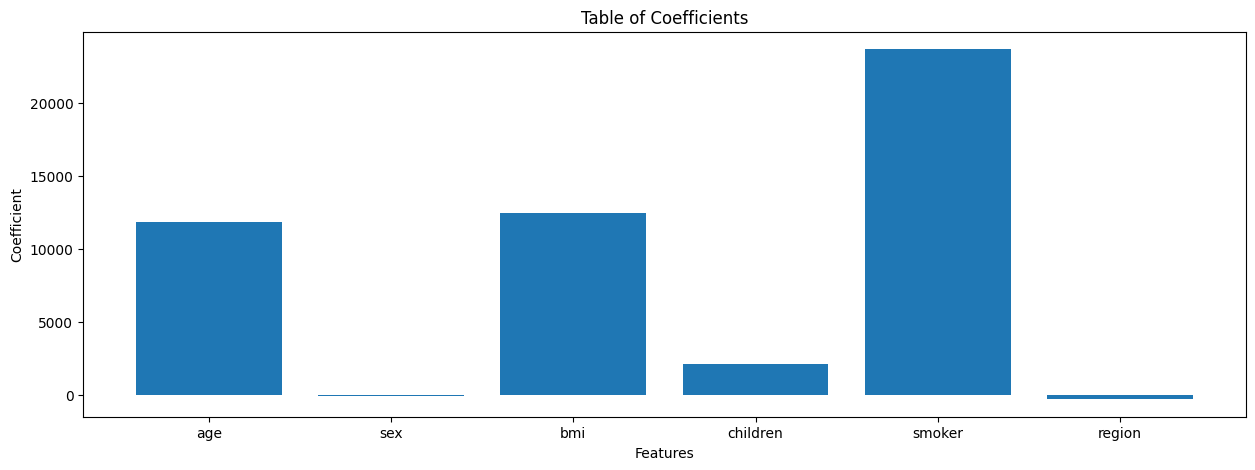

In [43]:
coefficients = model.coef_
features = X.columns
plt.figure(figsize=(15, 5))
plt.bar(features, coefficients)
plt.title('Table of Coefficients')
plt.xlabel('Features')
plt.ylabel('Coefficient')
plt.show()

# Regularization

L1 regularization, also known as Lasso (Least Absolute Shrinkage and Selection Operator) regularization, is a technique used in regression models that encourages simplicity and sparsity in the model coefficients. This is achieved by adding a penalty equal to the absolute value of the magnitude of coefficients to the loss function.\
</br>
Train a regression model using L1 regularization.

In [44]:
# TODO: Use Lasso from sklearn library
lasso = Lasso(alpha=1)
lasso.fit(X_train, y_train)
print(lasso.coef_)


[ 1.18166678e+04 -1.40520613e+01  1.24425048e+04  2.10908074e+03
  2.36411015e+04 -2.69540992e+02]


L2 regularization, also known as Ridge regularization, is a technique used in regression models to prevent overfitting by adding a penalty equivalent to the square of the magnitude of coefficients to the loss function.
</br>
Train a regression model using L2 regularization.

In [45]:
# TODO: Use Ridge from sklearn library
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 1.18145883e+04 -1.77603064e+01  1.24378283e+04  2.12305966e+03
  2.36338005e+04 -2.70225583e+02]


Test different regularization parameters (alpha) for each regularization method using cross validation and visualize the coefficients of the variables. Use MAPE for evaluation.

**Mean Absolute Percentage Error (MAPE)**:


 is a widely used metric for evaluating the accuracy of forecasting models. It quantifies the prediction error as a percentage, providing an intuitive measure of how far off predictions are from actual values. MAPE is defined as the average of the absolute percentage errors between predicted values and actual values. The formula for calculating MAPE is:

$$
\text{MAPE} = \frac{100}{N} \sum_{t=1}^{N} \left| \frac{A_t - F_t}{A_t} \right|
$$
    
Where:
- $N$ is the number of observations,
- $A_t$ is the actual value,
- $F_t$ is the forecasted value.

MAPE Lasso:  0.4242311805007553
MAPE Ridge:  0.4242064757191635


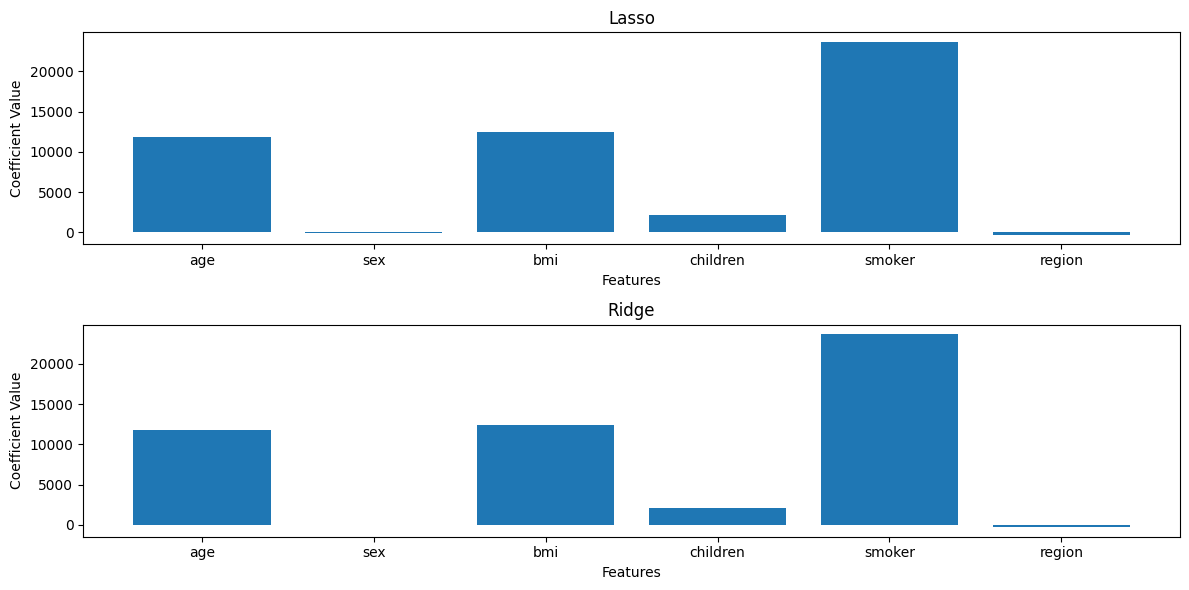

In [46]:
# TODO: Use folding methods and mape from sklearn library
kf = KFold(n_splits=5, shuffle=True, random_state=42)
mape_lasso = -cross_val_score(lasso, X, y, scoring='neg_mean_absolute_percentage_error', cv=kf).mean()
mape_ridge = -cross_val_score(ridge, X, y, scoring='neg_mean_absolute_percentage_error', cv=kf).mean()

print("MAPE Lasso: ", mape_lasso)
print("MAPE Ridge: ", mape_ridge)


coefficients_lasso = lasso.coef_
coefficients_ridge = ridge.coef_

feature_names = X.columns
# Plot Lasso coefficients
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.bar(feature_names, coefficients_lasso)
plt.title('Lasso')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')

# Plot Ridge coefficients
plt.subplot(2, 1, 2)
plt.bar(feature_names, coefficients_ridge)
plt.title('Ridge')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')

plt.tight_layout()
plt.show()

Add extra variables to dataset to make model more complex, then compare the results.

In [47]:
# Increase No. of dimensions using PolynomialFeatures from sklearn
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
feature_names = poly.get_feature_names_out(X_train.columns)

lasso_poly = Lasso(alpha=1)
lasso_poly.fit(X_train_poly, y_train)

ridge_poly = Ridge(alpha=1)
ridge_poly.fit(X_train_poly, y_train)

MAPE_lasso_train_data = mean_absolute_percentage_error(y_train,lasso_poly.predict(X_train_poly))
MAPE_lasso_test_data = mean_absolute_percentage_error(y_train,lasso_poly.predict(X_train_poly))
MAPE_ridge_train_data = mean_absolute_percentage_error(y_train,ridge_poly.predict(X_train_poly))
MAPE_ridge_test_data = mean_absolute_percentage_error(y_test,ridge_poly.predict(X_test_poly))


print("MAPE lasso train data",MAPE_lasso_train_data)
print("MAPE lasso test data",MAPE_lasso_test_data)
print("MAPE ridge train data",MAPE_ridge_train_data)
print("MAPE ridge test data",MAPE_ridge_test_data)

MAPE lasso train data 0.2951995076718488
MAPE lasso test data 0.2951995076718488
MAPE ridge train data 0.29533905894997386
MAPE ridge test data 0.31270201519951396


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.288e+09, tolerance: 1.544e+07
  model = cd_fast.enet_coordinate_descent(


Report your best model with its evaluated results.

In [48]:
print("MAPE lasso train complex: ",mean_absolute_percentage_error(y_train,lasso_poly.predict(X_train_poly)))
print("MAPE lasso test complex: ",mean_absolute_percentage_error(y_test,lasso_poly.predict(X_test_poly)))

print("MAPE ridge train complex: ",mean_absolute_percentage_error(y_train,ridge_poly.predict(X_train_poly)))
print("MAPE ridge test complex: ",mean_absolute_percentage_error(y_test,ridge_poly.predict(X_test_poly)))

best_model = Ridge(alpha=1)
best_model.fit(X_train_poly, y_train)

df_test_poly = poly.transform(test_df)
pred_y = best_model.predict(df_test_poly)
test_df['charges'] = pred_y
test_df['charges'].to_csv('./submission.csv', index=False)

MAPE lasso train complex:  0.2951995076718488
MAPE lasso test complex:  0.29877746148150275
MAPE ridge train complex:  0.29533905894997386
MAPE ridge test complex:  0.31270201519951396


## Questions

1. Compare the weight distribution when applying L1/L2 regularization and their sparsity?




- <span style="color:cyan;">**Answer:** Write your answer here</span>


2. How does the regularization parameter (alpha) affect each feature? Does it help to model's explainability?

- <span style="color:cyan;">**Answer:** Write your answer here</span>

3. How does the regularization affect dimension expansion?

- <span style="color:cyan;">**Answer:** Write your answer here</span>